In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Logistic regression 

Here we investiagate how the logistic regression equation can be used to make a 'figtree' plot. This plot is generated by calling the equation may times and plotting to values that are converged to. For small values of R there is one convergence point. For larger values, there is a wide spread of values - the system goes choatic. 

In [2]:
def LM(r,x):
    
    return r*x*(1-x)

Two ways of making a Regular figtree plot

Text(0,0.5,'z')

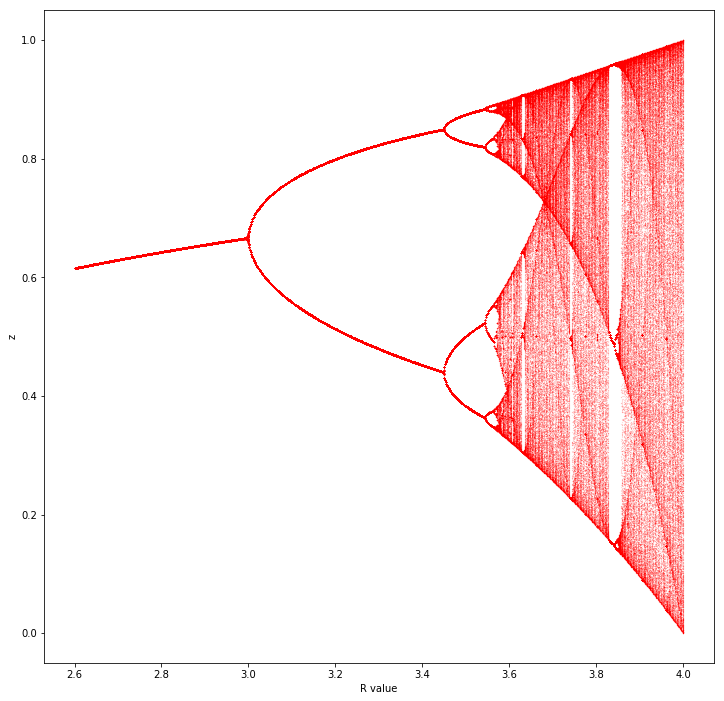

In [75]:

plt.figure(figsize=(12,12))

x0 = 0.49
n1 = 500
rspace = 1000
n2 = n1 + rspace
r = np.linspace(2.6,4.0,rspace)

#Alternative way using filling of matrix
A = np.zeros([rspace,rspace])
A_y_inc = 1.0/rspace

for i in range(rspace):
    
    r_val = r[i]
    z = np.zeros(n2-n1) #number of iterations to plot
    x = x0 #initial x value
    
    for j in range(n2):
        x = LM(r_val,x)
        
        #If converged, all these values will be the same
        if j >= n1:
            z[j-n1] = x
    
    #Fill matrix A with values in z
    A_index = (z/A_y_inc).astype(int)
    A[A_index,i] = 1
     
    x_dummy = 0.0*z+r_val #we want to plot all z values for given r_val
    plt.plot(x_dummy,z,'r.',markersize=0.1)

plt.xlabel('R value')
plt.ylabel('z')


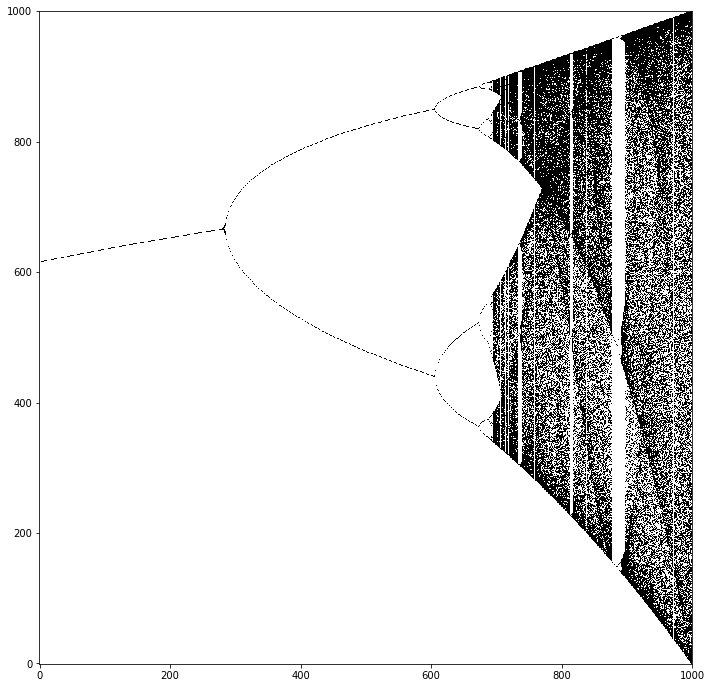

In [74]:
plt.figure(figsize=(12,12))
plt.imshow(A,cmap='Greys')
plt.gca().invert_yaxis()

CPU times: user 2.9 s, sys: 72.1 ms, total: 2.97 s
Wall time: 2.98 s


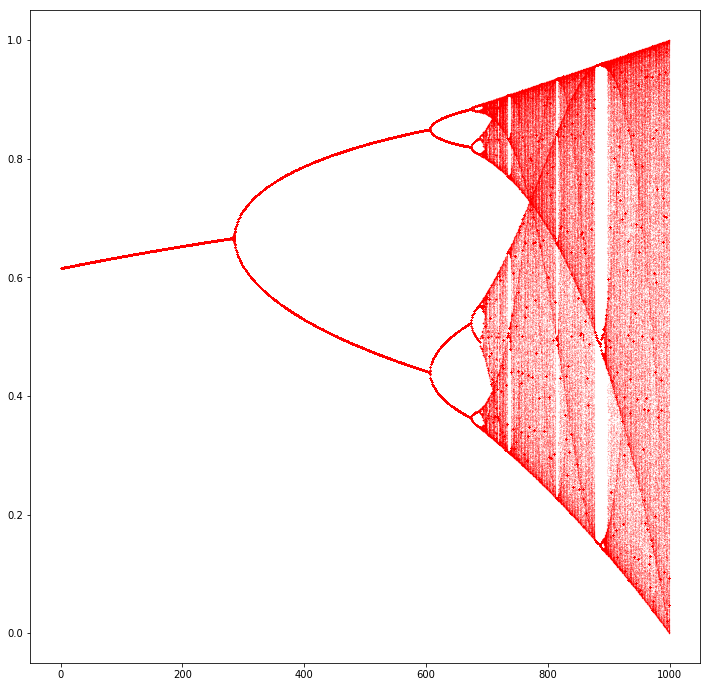

In [80]:
%%time
#Vectorized plot
fig = plt.figure(figsize=(12,12))
r = np.linspace(2.6,4.0,1000)
x = np.ones(len(r))*0.49

for i in range(n2):
    x = LM(r,x)    
    #If converged, all these values will be the same
    if i >= n1:
        z = x
    plt.plot(z,'r.',markersize=0.1)
  